<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningPractice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
dat = load_diabetes(as_frame = True)
data = dat.data

In [ ]:
x = data
y = dat.target

In [ ]:
import pandas as pd


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:

# CHECKOUT FAIZAN NOTES ###


from google.colab import files # uploading data to google colab
data = files.upload()
pd.read_csv("uploaded_data")

# FEATURE EXTRACTION
from sklearn.feature_extraction import DictVectorizer 
# converts a list of dixtionary object to feature matrix

from sklearn.impute import SimpleImputer
data.info() # to check numeric missing values
data.isnull().sum() 
data.isna().sum()
data.age.unique() # to check any values like in categorical data(? , / , NA etc)
data.replace("?" , np.nan , inplace = True) # replace unwanted values with np.nan

imputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
heart_data_imputed = imputer.fit_transform(data) # filling the missing values with mean


# labeling categorical values without using a transformer 
data = data.replace({"Sex" : {"M" : 1 , "F": 2 , "I": 3}})
y = data.pop("Label")
x = data

#FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
# above scalers column wise calculate the mean, std, max, min etc and transform the column values

# ADD DUMMY FEATURE - augments the dataset with a column vector of 1
#we add_dummy_feature for the bias term. y = wx1 +c, for the c term we add x0  which is our dummy_feature. 
#Therefore, y = mx1 + cx0, This is useful for adding a parameter for bias term in the model.
from sklearn.preprocessing import add_dummy_feature
data = add_dummy_feature(data)

import pandas as pd # onehot by pandas
dummies = pd.get_dummies(data , columns = ["label"] , prefix = ["one_hot"])

# CUSTOM TRANSFORMERS 
# Enables conversion of an existing python function into a transformer to assist in data cleaning or processing 
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log2)
ft_data = ft.fit_transform(data)

#POLYNOMIAL FEATURES
from sklearn.preprocessing import PolynomialFeatures
#geberate a new feature matrix consisting of all polynomial combinations of the features with the degree
#less than or equal to the specified degree
pf = PolynomialFeatures(degree = 2)
pf_data = pf.fit_transform(data)
pf.get_feature_names_out() # feature names
pf.get_feature_names() # feature combinations 


# DISCRETIZATION/ QUANTIZATION/BINNING
# transforms dataset with continuous  attributes to nominal attributes 
# one-hot discretized features can make the model more expressive
# For instance, preprocessing with discretizer can introduce nonlinearlity to linear models
from sklearn.preprocessing import KBinsDiscretizer
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]).reshape(9,1)
kbin = KBinsDiscretizer(n_bins = 5 , encode = "onehot" )
x = kbin.fit_transform(X) #sparse matrix
x.toarray() # convert to numpy array

# HANDLING CATEGORICAL VARIABLE 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
ohe = OneHotEncoder() # uses 1 and 0 to represent presence and absence of values 
le = LabelEncoder() # used to encode nominal data but this approach assigns ordering to 
                    # to the categories eventually thus providing wrong info to the ML model, therefore we use One HOt
oe = OrdinalEncoder() # used to encode ordinal data

# MUTILABEL BINARIZER 
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = np.array([{'action', 'comedy' },
{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]) 
mlb.fit_transform(X)

#COLUMN TRANSFORMER
#applies different transformers to seperate subsets of features
X = np.array([[20.0, 11.2, 15.6, 13.0, 18.6, 16.4], 
              ['male', 'female', 'female', 'male', 'male', 'female']]).T

from sklearn.compose import ColumnTransformer
column_trans = ColumnTransformer([("scaler" , MaxAbsScaler() , [0]) , 
                                  ("pass" , "passthrough" , [0]) , 
                                 ( "categorical_encoder ", OrdinalEncoder() , [1:4])])


column_trans.fit_transform(data)


#TRANSFORMED TARGET REGRESSOR
from sklearn.compose import TransformedTargetRegressor
#transforms the target variable y before fitting a regression model
# => the predicted values are mapped back to original space via an inverse transform
# => It takes regressor and transformer to be applied to the target variable as arguments 
from sklearn.linear_model import LinearRegression
tf = np.log #transformer function
tt = TransformedTargetRegressor(regressor = LinearRegression() , func = tf , inverse_func= np.exp)

tt.fit(x, y)
tt.predict(x)

#FEATURE SELECTION
# VarianceThreshold
#this transformer helps to keep only high variance features by providing a certain threshold
#features with variance greater or equal to threshold value are kept rest are removed
#by default removes features with same value, i.e 0 variance
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 9)
data = np.array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])
np.var(data , axis = 0)
vt.fit_transform(data) # column 1 will be removed because of var below threshold

#SelectKBest 
# it selects k highest scoring features based on a function and removes the rest of the features
from sklearn.feature_selection import SelectKBest , mutual_info_regression, f_regression# both are scoring function for regression
skb = SelectKBest(mutual_info_regression , k = 3) 
skb.fit_transform(x, y) # only top 3 features will be selected according to the mutual_info_regression
skb.get_features_names_out()

#SelectPercentile
#similar to SelectKBest, it selects top percentile of all features and drops the rest of the features 
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression , percentile = 30)
sp.fit_transform(x, y)

#GenericUnivariateSelect
#it applies univariate statistical test(ANOVA - We compare each feature to the target variable, to see whether there is any statistically significant relationship between them)
# with a certain strategy, through mode parameter. where mode can take values percentile, k_best, fpr(false positive rate) , fdr(false discovery rate), fwe(family wise error rate) 

from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression , mode = "k_best" , param = 3) # this will give you the same result as K_best function
gus.fit_transform(x , y) 

#Wrapper based methods 
#RFE (Recursive Feature Elimination)
# => fits a model and 
# => ranks the features, afterwards it removes one or more features(depending upon "step" parameter)
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator , n_features_to_select = 3 , step = 1) # step represents number of features to remove at each iteration.
RFE_data = selector.fit(x , y)
selector.get_support() # True indicates selected columns

#SelectFromModel # Meta-transformer for selecting features based on importance weights.
#selects desired no. of important features specified by "max_features" parameter, 
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(x, y)
model = SelectFromModel(estimator , max_features = 3 , prefit = True) #   prefit is whether the object.fit method has already been called(True) or not(False)
model.transform(x)
# another way to run above code
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
model = SelectFromModel(estimator , max_features = 3 , prefit = False) #    Whether a prefit model is expected to be passed into the constructor
model.fit_transform(x , y)

#SequentialFeatureSelector
# It performs feature selection by selecting or deselecting features one by one in a greedy manner
from sklearn.feature_selection import SequentialFeatureSelector
# %%time prints the wall time for the entire cell whereas %time gives you the time for first line only
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator , n_features_to_select = 3 , direction = "backward")
sfs.fit_transform(x, y)
sfs.get_support()

#PCA
#is used to decompose a multivaraite dataset in a set of successive orthogonal components
#that capture maximum amount of the variance
#helps reduce dimensions of a dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit_transform(x)
pca.components_ # each column reprents a principal component
pca.mean_
pca.explained_variance_ 

#Pipeline
#Sequentially apply a list of transformers and estimators
from sklearn.pipeline import Pipeline
estimators = [
    ("imputer" , SimpleImputer()) ,
    ("scaler" , StandardScaler())
]
pipe = Pipeline(steps = estimators)

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer() , 
                     StandardScaler())

#FeatureUnion 
#concatenates results of multiple transformer objects
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('selector', ColumnTransformer([(
        'select_first_4', 'passthrough', slice(0, 4))])),

    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = ColumnTransformer([
    ('label_binarizer', LabelBinarizer(), [4]),
])

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),
                                               ('cat_pipeline', cat_pipeline)
                                               ])
from sklearn import set_config
set_config(display='diagram')

#displays HTML representation in a jupyter context
full_pipeline

#Handling Imbalanced Data 
#Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

#There are two main approaches to handle imbalanced data:

#Undersampling : Undersampling refers to sampling from the majority class in order to keep only a part of these data points
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter # gives the count of unique values.
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
y = wine_data.pop("quality")
x = wine_data

undersampler = RandomUnderSampler(random_state = 0)
x_ , y_ = undersampler.fit_resample(x, y)
Counter(y_) #The class with the least number of samples is '3'.
#Hence all the other class samples are reduced to the number of samples in the least class.

#Oversampling : Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class.
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
x_, y_ = oversampler.fit_resample(X, y)
Counter(y_) # The class with the majority number of samples is '5'. Hence all the other class samples that are lesser than this class count are
# newly sampled to the number of samples in the majority class.

#Oversampling using SMOTE(Synthetic Minority Oversampling Technique) is a technique used for oversampling
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
x_ , y_ = oversampler.fit_resample(x , y)
Counter(y_)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('selector', ColumnTransformer([(
        'select_first_4', 'passthrough', slice(0, 4))])),

    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = ColumnTransformer([
    ('label_binarizer', LabelBinarizer(), [4]),
])

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),
                                               ('cat_pipeline', cat_pipeline)
                                               ])
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('scaler', StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

In [ ]:

from google.colab import files # uploading data to google colab
files.upload()


In [ ]:
data = pd.read_csv("DataPreprocessingGraded_dataset.csv")
data.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer , OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipe = Pipeline([
("first" , ColumnTransformer([
    ("imputer" , SimpleImputer() , [0,1]),
]) , 
("second",ColumnTransformer[("scaler" , StandardScaler() , [0,1,2,3])]) )


cat_pipe = ColumnTransformer([
    ("encoder" , OrdinalEncoder() , [4] )
])


SyntaxError: ignored

In [ ]:
num_pipe = ColumnTransformer([
    ("imputer" , SimpleImputer() , [0,1]),
    ("scaler" , StandardScaler() , [0,1,2,3])

])

cat_pipe = ColumnTransformer([
    ("encoder" , OrdinalEncoder() , [4] )
])


full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipe),
                                               ('cat_pipeline', cat_pipe)
                                               ])
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                ColumnTransformer(transformers=[('imputer',
                                                                 SimpleImputer(),
                                                                 [0, 1]),
                                                                ('scaler',
                                                                 StandardScaler(),
                                                                 [0, 1, 2,
                                                                  3])])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('encoder',
                                                                 OrdinalEncoder(),
                                                                 [4])]))])

In [ ]:
full_pipeline.fit_transform(data)

ValueError: ignored

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.1)
vt.fit_transform(data)

In [ ]:
|wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


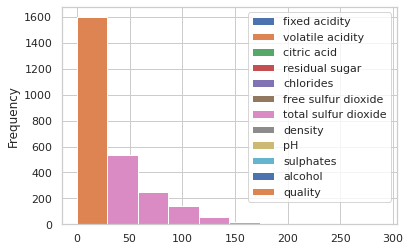

In [ ]:
wine_data.plot.hist()

In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersampler = RandomUnderSampler(random_state = 0)
x_ , y_ = undersampler.fit_resample(x, y)

Counter(y)
Counter(x_)

Counter({'fixed acidity': 1,
         'volatile acidity': 1,
         'citric acid': 1,
         'residual sugar': 1,
         'chlorides': 1,
         'free sulfur dioxide': 1,
         'total sulfur dioxide': 1,
         'density': 1,
         'pH': 1,
         'sulphates': 1,
         'alcohol': 1})

In [ ]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
import pandas as pd
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_data.shape

(1599, 12)

In [ ]:
wine_data.quality.value_counts(ascending = True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

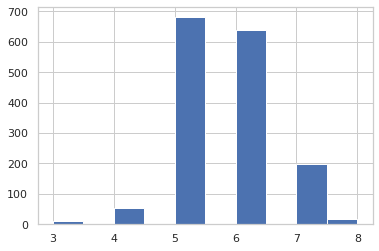

In [ ]:
wine_data.quality.hist(bins = 10)
plt.show()

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit_transform(x)
pca.components_
pca.mean_




array([-3.63962254e-16,  1.30991246e-16, -8.01395149e-16,  1.28981793e-16,
       -9.04254047e-17,  1.30112110e-16, -4.56397112e-16,  3.86317424e-16,
       -3.84810333e-16, -3.39848813e-16])

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
%%time 
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator , n_features_to_select = 3 , direction = "backward")
sfs.fit_transform(x, y)
sfs.get_support()

UsageError: Line magic function `%%time` not found.


In [ ]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(x, y)
model = SelectFromModel(estimator , max_features = 3 , prefit = True) #    Whether a prefit model is expected to be passed into the constructor
model.transform(x)

NameError: ignored

In [ ]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
model = SelectFromModel(estimator , max_features = 3 , prefit = False) #    Whether a prefit model is expected to be passed into the constructor
model.fit_transform(x , y)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
%%time 
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator , n_features_to_select = 3 , direction = "backward")
sfs.fit

In [ ]:
from sklearn.feature_selection import SelectFromModel

?SelectFromModel

In [ ]:
from sklearn.feature_selection import RFE
?RFE
estimator = LinearRegression()
selector = RFE(estimator , n_features_to_select = 3 , step = 1)
RFE_data = selector.fit_transform(x , y)
selector.get_support() 

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
selector.get_feature_names_out()

In [ ]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression , percentile = 30)
sp.fit_transform(x, y)
sp.get_feature_names_out()

In [ ]:
from sklearn.datasets import load_iris
x , y = load_iris(return_X_y = True , as_frame = True)



In [ ]:
x.columns

In [ ]:
from sklearn.feature_selection import SelectKBest , mutual_info_regression, f_regression# both are scoring function for regression
skb = SelectKBest(mutual_info_regression , k = 3) 
skb.fit_transform(x, y) # only top 3 features will be selected according to the mutual_info_regression
skb.get_feature_names_out()

In [ ]:
data = np.array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])
data       


In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 9)
vt.fit_transform(data)

In [ ]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]
data

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data) #creates a 2-d matrix
data_transformed

In [ ]:
np.var(data_transformed, axis=0)

In [ ]:
# Generate some test values
x = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()
x

In [ ]:
y

In [ ]:
from sklearn.compose import TransformedTargetRegressor
#transforms the target variable y before fitting a regression model
# => the predicted values are mapped back to original space via an inverse transform
# => It takes regressor and transformer to be applied to the target variable as arguments 
from sklearn.linear_model import LinearRegression
tf = np.log #transformer function
tt = TransformedTargetRegressor(regressor = LinearRegression() , func = tf , inverse_func= np.exp)

tt.fit(x, y)
tt.predict(x)
print("og x values", x.T)
print("og y values" , y)
print("predicted y values" , tt.predict(x))


In [ ]:
X = np.array([[20.0, 11.2, 15.6, 13.0, 18.6, 16.4], 
              ['male', 'female', 'female', 'male', 'male', 'female']]).T
X

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = np.array([{'action', 'comedy' },
{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]) 
mlb.fit_transform(X)

In [ ]:
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]).reshape(9,1)
X

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins = 5 , encode = "onehot" )
x = kbin.fit_transform(X)
x.toarray()

In [ ]:
data.head()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid")

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]
dv.fit_transform(data)

In [ ]:
from sklearn.impute import SimpleImputer
cols = ["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                         encoding='utf-8', header = None)
heart_data.columns = cols

In [ ]:
heart_data.head()

In [ ]:
heart_data.columns

In [ ]:
heart_data.info()

In [ ]:
heart_data.isna().sum()

In [ ]:
heart_data.isnull().sum()

In [ ]:
heart_data.ca.unique()

In [ ]:
heart_data.thal.unique()

In [ ]:
heart_data.replace("?" , np.nan , inplace = True)

In [ ]:
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean" )
heart_data_imputed = imputer.fit_transform(heart_data )
heart_data_ = pd.DataFrame(data = heart_data_imputed)
heart_data_.columns = cols
heart_data_.head()

In [ ]:
heart_data_.info()

In [ ]:
heart_data_.thal.unique()

In [ ]:
data[:5]

In [ ]:
data.info()

In [ ]:
cols = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
a_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, encoding='utf-8', names=cols)
a_data

In [ ]:
a_data.Sex.unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
obj = LabelEncoder()
a_data = a_data.replace({"Sex" : {"M" : 1 , "F": 2 , "I": 3}})

In [ ]:
a_data.info()

In [ ]:
y = a_data.pop("Rings")
x = a_data
x.info()

In [ ]:
a_data.describe().T

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

In [ ]:
mm= MinMaxScaler()
x_norm = mm.fit_transform(x)
x_norm[:5]

In [ ]:
x_norm.mean(axis = 0)

In [ ]:
x_norm.std(axis = 0)

In [ ]:
X = np.array([4, 3, 2, 5, 6]).reshape((5, 1))

In [ ]:
X

In [ ]:
ss = StandardScaler()
X_  = ss.fit_transform(X)
X_.mean()

In [ ]:
X_.std()

In [ ]:
from sklearn.preprocessing import add_dummy_feature
x_norm = add_dummy_feature(x_norm)
print(x_norm)

In [ ]:
heart_data.head(5)

In [ ]:
from sklearn.preprocessing import FunctionTransformer 


In [ ]:
trans = FunctionTransformer(np.log2)
trans.fit_transform(data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
a_data.head()

In [ ]:
a_data.shape

In [ ]:
 a_data_copy = a_data.copy()
 a_data = a_data.drop(["Sex"] , axis = 1)
 

In [ ]:
a_data.columns

In [ ]:
pt = PolynomialFeatures(degree= 2)
a_data_pt = pt.fit_transform(a_data)


In [ ]:
a_data_pt.shape

In [ ]:
pt.get_feature_names()

In [ ]:
pt.feature_names_in_

In [ ]:
pt.get_feature_names_out()